Code to train an Temporal Difference Error modulated Hebbian Learning (TDHL) agent to navigate to a target in a continuous 2D arena
Importantly, there is only a single episode and the trial does not end even when the agent reaches the target. The agent can be rewarded multiple times if it remains at the target location.
Code by: M Ganesh Kumar & Blake Bordeleon
Date: 02/15/2024

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from backend import TwoDimNav, PC_AC_agent

In [50]:
train_episodes = 1
test_episodes = 1

tmax = 10000
goalsize = 0.25
startcoord = 'center'
goalcoord = [0.7, 0.7]
testgoalcoord = [-0.7,-0.7]

seed = np.random.choice(np.arange(100),1)
print(seed)
env = TwoDimNav(startcoord=startcoord, goalcoord=goalcoord, goalsize=goalsize, tmax=tmax, seed=seed)

[72]


In [51]:
# initialize agent
alr = 0.00  # 0.0075
clr = 0.025  # 0.025

agent = PC_AC_agent(alr=alr, clr=clr)

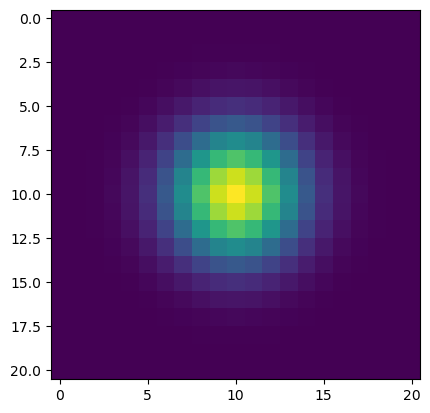

In [52]:
# visualize place field at arbitary coordinates
xy = np.array([0,0])
pc = agent.get_pc(xy)
plt.imshow(pc.reshape(agent.npc, agent.npc))

[0. 0.]
State: [0. 0.], Goal: [0.7 0.7]


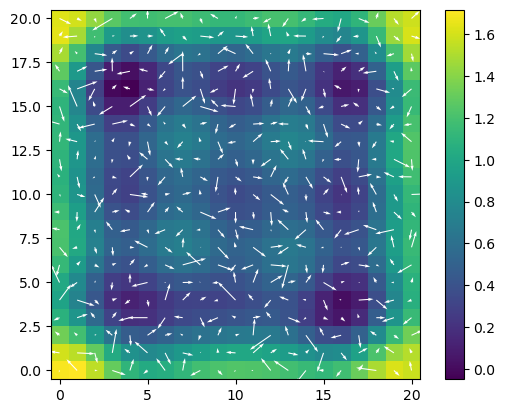

E 1/ 1, R True, t 9999
Completion 9870/1


In [53]:

latency = []
aprob = []
success = 0
tds = []

for e in range(train_episodes):
    state, goal, eucdist, done = env.reset()

    for t in range(tmax):

        onehotg = agent.get_action(state)

        # eucdist is euclediean distance to goal, done is a sparse scalar reward signal 
        newstate, eucdist, done = env.step(onehotg) 

        # use scalar sparse reward signal to update TD error
        agent.learn(newstate=newstate, reward=done)

        tds.append(agent.td)

        state = newstate.copy()

        if done:
            success+=1
            #break
            
    if e % 25 == 0:
        agent.plot_maps(env)

    latency.append(t)
    #print(agent.wC.max(), agent.wA.max())
    print(f'E {e+1}/ {train_episodes}, R {done}, t {t}')


print(f"Completion {success}/{train_episodes}")

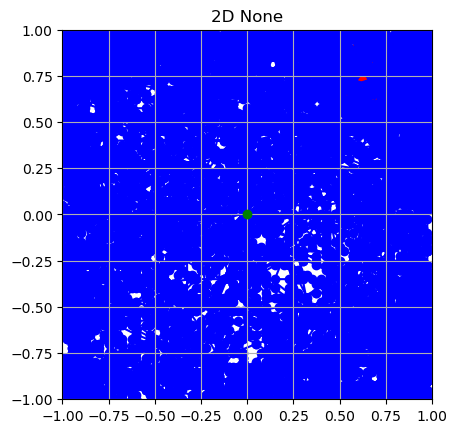

In [54]:
env.plot_trajectory()

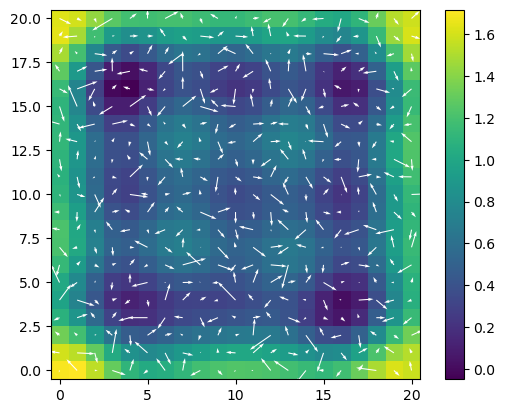

In [55]:
# plot value and policy maps
agent.plot_maps(env)

In [56]:
# Test adaptability of learned policy with new goal location 
seed = np.random.choice(np.arange(100),1)
print(seed)
testenv = TwoDimNav(startcoord=startcoord, goalcoord=testgoalcoord, goalsize=goalsize, tmax=tmax, seed=seed)

[55]


In [57]:
# reuse trained agent

testlatency = []
testsuccess = 0
testtds = []

for e in range(test_episodes):
    state, goal, eucdist, done = testenv.reset()

    for t in range(tmax):

        onehotg = agent.get_action(state)

        # eucdist is euclediean distance to goal, done is a sparse scalar reward signal 
        newstate, eucdist, done = testenv.step(onehotg) 

        # use scalar sparse reward signal to update TD error
        agent.learn(newstate=newstate, reward=done)

        testtds.append(agent.td)

        state = newstate.copy()

        if done:
            testsuccess+=1
            #break

    testlatency.append(t)
    #print(agent.wC.max(), agent.wA.max())
    print(f'E {e+1}/ {test_episodes}, R {done}, t {t}')
    

print(f"Completion {testsuccess}/{test_episodes}")

[0. 0.]
State: [0. 0.], Goal: [-0.7 -0.7]
E 1/ 1, R True, t 9999
Completion 9924/1


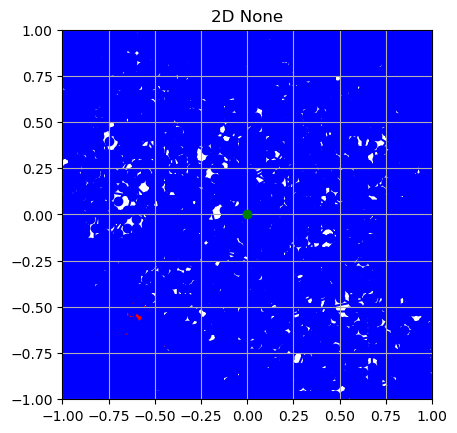

In [58]:
testenv.plot_trajectory()

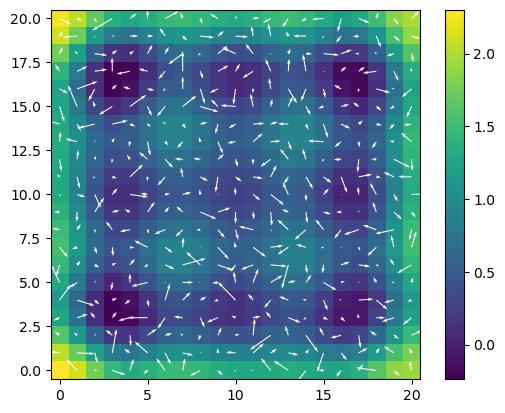

In [59]:
# plot value and policy maps, value maps usually shift faster than actor policy
agent.plot_maps(testenv)

Text(0.5, 1.0, 'Completion: Train:9870/1, Test: 9924/1')

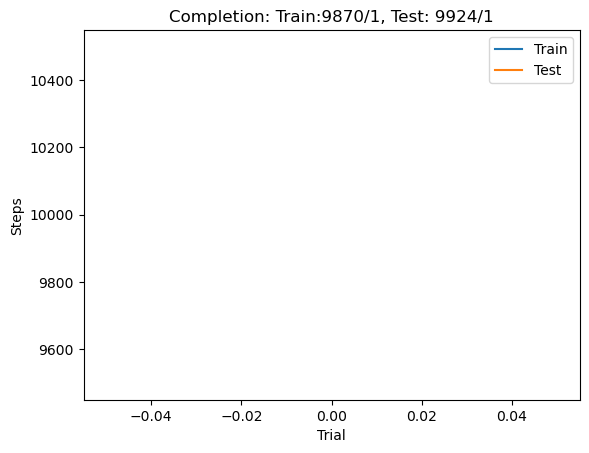

In [60]:
# plot latency to reach goal
plt.figure()
plt.plot(latency,label='Train')
plt.plot(testlatency, label='Test')
plt.legend()
plt.xlabel('Trial')
plt.ylabel('Steps')
plt.title(f"Completion: Train:{success}/{train_episodes}, Test: {testsuccess}/{test_episodes}")

Text(0.5, 1.0, 'Temporal Difference Error')

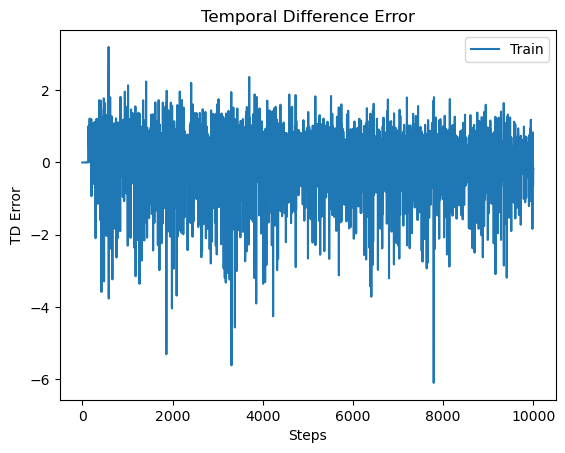

In [61]:
# plot latency to reach goal
plt.figure()
plt.plot(tds,label='Train')
#plt.plot(testtds, label='Test')
plt.legend()
plt.xlabel('Steps')
plt.ylabel('TD Error')
plt.title(f"Temporal Difference Error")